# SMAI Assignment - 2

## Question 1: Naive Bayes and Clustering

### Part 1: Naive Bayes

[Files](https://drive.google.com/drive/folders/1OUVrOMp2jSSBDJSqvEyXDFTrhiyZnqit?usp=sharing)

You will be performing Sentiment Analysis on a product review dataset with reviews from customers and star rating belonging to four classes (1,2,4,5). You can use sklearn for this question. Your tasks are as follows:

1.   Clean the text by removing punctations and preprocess them using techniques such as stop word removal, stemming etc. You can explore anything!
1.  Create BoW features using the word counts. You can choose the words that form the features such that the performance is optimised. Use the train-test split provided in `train_test_index.pickle` and report any interesting observations based on metrics such as accurarcy, precision, recall and f1 score (You can use Classification report in sklearn).
1. Repeat Task 2 with TfIdf features.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pickle
with open('/content/drive/MyDrive/train_test_index.pickle', 'rb') as handle:
    train_test_index_dict = pickle.load(handle)

In [3]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/product_reviews.csv')
data.head()

,text,stars,sentiment
0,Total bill for this horrible service? Over $8G...,1.0,0
1,Went in for a lunch. Steak sandwich was delici...,5.0,1
2,This place has gone down hill. Clearly they h...,1.0,0
3,"Walked in around 4 on a Friday afternoon, we s...",1.0,0
4,Michael from Red Carpet VIP is amazing ! I rea...,4.0,1


In [4]:
# Text cleaning
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

# Download specific NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

def clean_text(text):
    text=text.lower()

    # substitute anything that is not a alphabet with ''
    text=re.sub(r'[^\w\s]','',text)

    tokens =word_tokenize(text)

    # remove stop words
    stop_words=set(stopwords.words('english'))

    tokens=[word for word in tokens if word not in stop_words]
    # print(tokens)

    #stemming
    stemmer=PorterStemmer()
    tokens=[stemmer.stem(word) for word in tokens]
    # print(tokens)

    cleaned_text= " ".join(tokens)

    return cleaned_text
data['cleaned_text']=data['text'].apply(clean_text)
print(data.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                                text  stars  sentiment  \
0  Total bill for this horrible service? Over $8G...    1.0          0   
1  Went in for a lunch. Steak sandwich was delici...    5.0          1   
2  This place has gone down hill.  Clearly they h...    1.0          0   
3  Walked in around 4 on a Friday afternoon, we s...    1.0          0   
4  Michael from Red Carpet VIP is amazing ! I rea...    4.0          1   

                                        cleaned_text  
0  total bill horribl servic 8g crook actual nerv...  
1  went lunch steak sandwich delici caesar salad ...  
2  place gone hill clearli cut back staff food qu...  
3  walk around 4 friday afternoon sat tabl bar wa...  
4  michael red carpet vip amaz reach need help pl...  


In [5]:
# Creating BoW features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(data['cleaned_text'])
y=data['stars']
# print(X.shape)
# print(y.shape)
X_train=X[train_test_index_dict['train_index']]
y_train=y[train_test_index_dict['train_index']]
X_test=X[train_test_index_dict['test_index']]
y_test=y[train_test_index_dict['test_index']]

In [6]:
# Fitting naive bayes classifier
from sklearn.naive_bayes import MultinomialNB

# train the classifer
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# predict
y_pred = nb_classifier.predict(X_test)

# Evaluate the performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Using BoW features: ")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Using BoW features: 
Accuracy: 0.6970110239799977
Precision: 0.673678423528682
Recall: 0.6970110239799977
F1-score: 0.6773193893634201


In [7]:
# Creating tf-idf features
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(data['cleaned_text'])

X_train_tfidf = X_tfidf[train_test_index_dict['train_index']]
X_test_tfidf = X_tfidf[train_test_index_dict['test_index']]

In [8]:
# Fitting naive bayes classifier
nb_classifier.fit(X_train_tfidf, y_train)

# predict
y_pred = nb_classifier.predict(X_test_tfidf)

print("Using Tf-Idf features: ")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Using Tf-Idf features: 
Accuracy: 0.5876804182293442
Precision: 0.5737840185736859
Recall: 0.5876804182293442
F1-score: 0.44811561588533144


### Part 2: Clustering

You will be performing kmeans clustering on the same product reviews dataset from Part 1. In this question, instead of statistically computing features, you will use the embeddings obtained from a neural sentiment analysis model (huggingface: siebert/sentiment-roberta-large-english).

You can use sklearn for this question. Your tasks are as follows:


1. Perform kmeans clustering using sklearn. Try various values for number of clusters (k) and plot the elbow curve. For each value of k, plot WCSS (Within-Cluster Sum of Square). WCSS is the sum of the squared distance between each point and the centroid in a cluster.
1. Perform task 1 with cluster initialisation methods [k-means++, forgy ("random" in sklearn)].
1. In this case, since the ground truth labels (star rating) are available we can evaluate the clustering using metrics like purity, nmi and rand score. Implement these metrics from scratch and evaluate the clustering. [Reference](https://nlp.stanford.edu/IR-book/html/htmledition/evaluation-of-clustering-1.html)

In [9]:
import gzip
import numpy as np

f = gzip.GzipFile('/content/drive/MyDrive/roberta_embeds.npy.gz', "r")
embeds = np.load(f)
print(embeds.shape)

(26661, 1024)


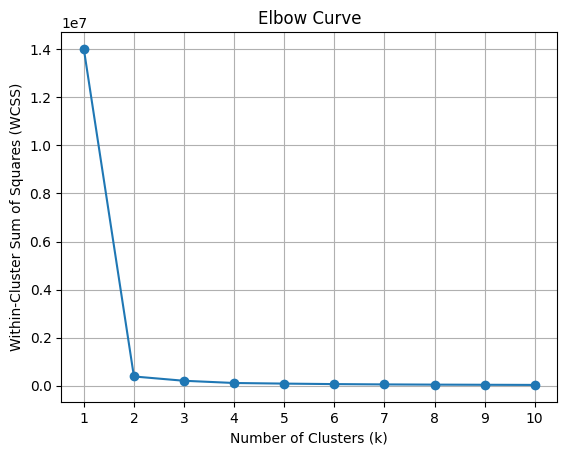

In [10]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')
X=embeds

k_values = range(1, 11)

wcss_values = []

for k in k_values:
    # Fitting KMeans clustering on the data

    kmeans = KMeans(n_clusters=k,init="k-means++")
    estimator=kmeans.fit(X)
    # gives the sum of square disances
    wcss = kmeans.inertia_
    wcss_values.append(wcss)

# Plot the elbow curve
plt.plot(k_values, wcss_values, marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_values)
plt.grid(True)
plt.show()


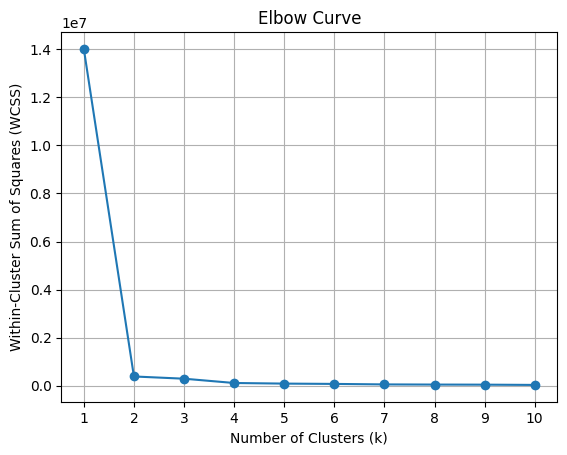

In [11]:
# Instead of randomly chosing some centers, we select certain data points as centers using kmeans++ method
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X=embeds

k_values = range(1, 11)

wcss_values = []

for k in k_values:
    # Fitting KMeans clustering on the data

    kmeans = KMeans(n_clusters=k, init="random")
    estimator=kmeans.fit(X)
    # sum of squared distances
    wcss = kmeans.inertia_
    wcss_values.append(wcss)
# Plot the elbow curve
plt.plot(k_values, wcss_values, marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [30]:
def calculate_purity(labels_true, labels_pred):
    # Initialize purity
    purity = 0

    # Loop through each cluster
    for cluster in np.unique(labels_pred):
        # Find the most frequent true label in the cluster
        cluster_labels = labels_true[labels_pred == cluster]
        majority_label = np.argmax(np.bincount(cluster_labels))

        # Add the count of the majority label to purity
        purity += np.sum(cluster_labels == majority_label)

    # Normalize purity by the number of samples
    purity /= len(labels_pred)

    return purity
def calculate_nmi(clusters,length,y):
    h_y=0
    _,counts = np.unique(y, return_counts=True)
    # calculate the entropy for each rating value

    for i in counts:
        h_y=h_y-((i/y.shape[0])*np.log2(i/y.shape[0]))
    h_c=0
    for i in clusters:
        h_c=h_c-((i.shape[0]/y.shape[0])*np.log2(i.shape[0]/y.shape[0]))
    h_y_c=0
    for i in clusters:
        _,counts=np.unique(i,return_counts=True)
        r=0
        for j in counts:
            r+=((j/i.shape[0])*np.log2(j/i.shape[0]))
        h_y_c=h_y_c-((i.shape[0]/y.shape[0])*r)
    nmi_val=(2*(h_y-h_y_c))/(h_y+h_c)
    return nmi_val
def rand_score(clusters,length):
    tp_plus_fp=0
    total=0
    for i in clusters:
        tp_plus_fp+=((i.shape[0])*(i.shape[0]-1))/2
        total+=i.shape[0]
    tp=0
    cls=[]
    cls_index=[]
    for i in clusters:
        _,counts = np.unique(i, return_counts=True)
        for j in counts:
            tp+=(j*(j-1))/2
        cls_index.append(_)
        cls.append(counts)
    total=(total*(total-1))/2
    fn=0
    for i in range(len(cls)-1):
        for j in range(i+1,len(cls)):
            for k in cls_index[i]:
                if k in cls_index[j]:
                    fn+=cls[i][np.where(cls_index[i]==k)[0]]*cls[j][np.where(cls_index[j]==k)[0]]
    tn=total-fn-tp_plus_fp
    return (tp+tn)/total
kmeans = KMeans(n_clusters=4, init="random")
kmeans.fit(X)
pred_labels = kmeans.labels_
# print(pred_labels)
pred_clusters=[[],[],[],[]]
for i in range(len(pred_labels)):
    pred_clusters[pred_labels[i]].append(y[i])
pred_clusters = [np.array(lst) for lst in pred_clusters]
print("Purity: ",calculate_purity(y,pred_labels))
print("Nmi: ",calculate_nmi(pred_clusters,len(pred_labels),y))
print("Rand_Score: ",rand_score(pred_clusters,len(pred_labels)))

Purity:  0.7082254979183077
Nmi:  0.4621618040270677
Rand_Score:  [0.72462186]
